### Exercici 1 (Nivell 1)
#### Crea almenys tres models de regressió diferents per intentar predir el millor possible l’endarreriment dels vols (ArrDelay) de DelayedFlights.csv.

In [1]:
#importing python libraries and modules

#libraries
import numpy as np #library for scientific computing
import pandas as pd #library for dataframes 
import matplotlib.pyplot as plt #graphic library
import seaborn as sns #advanced graphic library based on matplotlib
import warnings #library to manage warnings
import scipy #library with algorithms for statistics and scientific computing
from sklearn.linear_model import LinearRegression #regression algorithm
from sklearn.ensemble import RandomForestRegressor #regression algorithm
from sklearn.tree import DecisionTreeRegressor #regression algorithm
from sklearn.model_selection import GridSearchCV #optimization parameter algorithm
from sklearn.model_selection import cross_val_score #cross validation algorithm

#modules
from sklearn.model_selection import train_test_split #train test split 
from sklearn.metrics import mean_squared_error #MSE calculation 
from sklearn.metrics import r2_score #coefficient of determination calculation

warnings.filterwarnings('ignore')

In [2]:
#importing dataset

df_flight_imported = pd.read_csv('DelayedFlights.csv', index_col=0)

#we take a sample to speed up the algorithm
#this may affect to results
df_flight = df_flight_imported.sample(100000)

In [3]:
#dataset information

#conclusions from dataset:
#some columns have many NaN values
#if object types (5) are going to be used as a predictors,
#they should be converted from categorical to numerical

print(df_flight.info(null_counts=True))
df_flight.describe().transpose()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 5465142 to 6754524
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               100000 non-null  int64  
 1   Month              100000 non-null  int64  
 2   DayofMonth         100000 non-null  int64  
 3   DayOfWeek          100000 non-null  int64  
 4   DepTime            100000 non-null  float64
 5   CRSDepTime         100000 non-null  int64  
 6   ArrTime            99643 non-null   float64
 7   CRSArrTime         100000 non-null  int64  
 8   UniqueCarrier      100000 non-null  object 
 9   FlightNum          100000 non-null  int64  
 10  TailNum            100000 non-null  object 
 11  ActualElapsedTime  99580 non-null   float64
 12  CRSElapsedTime     99990 non-null   float64
 13  AirTime            99580 non-null   float64
 14  ArrDelay           99580 non-null   float64
 15  DepDelay           100000 non-null  float64


,count,mean,std,min,25%,50%,75%,max
Year,100000.0,2008.000000,0.000000,2008.0,2008.0,2008.0,2008.0,2008.0
Month,100000.0,6.110740,3.480686,1.0,3.0,6.0,9.0,12.0
DayofMonth,100000.0,15.719580,8.786046,1.0,8.0,16.0,23.0,31.0
DayOfWeek,100000.0,3.985930,1.998557,1.0,2.0,4.0,6.0,7.0
DepTime,100000.0,1516.764760,451.042339,1.0,1201.0,1544.0,1900.0,2400.0
CRSDepTime,100000.0,1466.561170,425.443134,1.0,1130.0,1510.0,1815.0,2359.0
ArrTime,99643.0,1609.489277,547.465165,1.0,1316.0,1714.0,2030.0,2400.0
CRSArrTime,100000.0,1633.746410,464.588590,1.0,1325.0,1705.0,2014.0,2400.0
FlightNum,100000.0,2182.898490,1949.553994,1.0,607.0,1539.0,3425.0,9740.0
ActualElapsedTime,99580.0,133.467514,72.177437,16.0,80.0,116.0,165.0,662.0


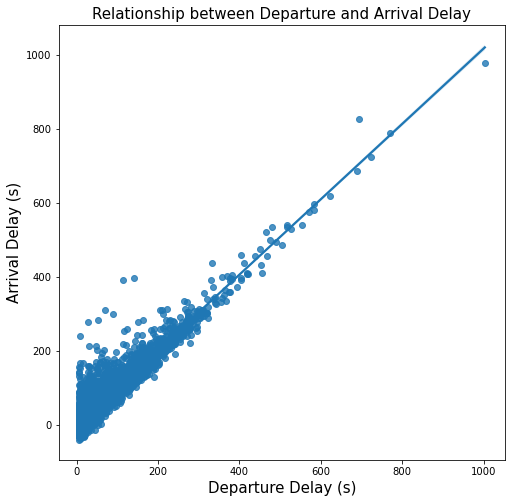

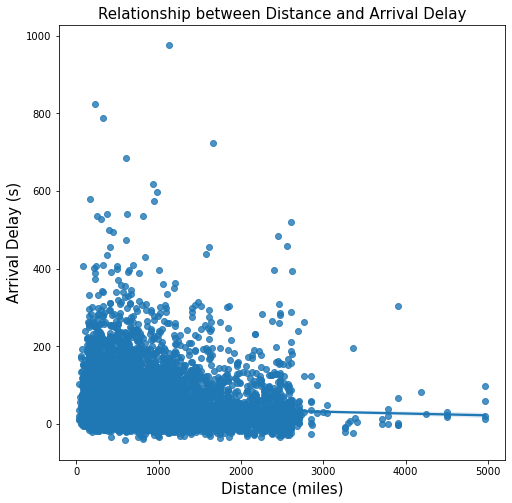

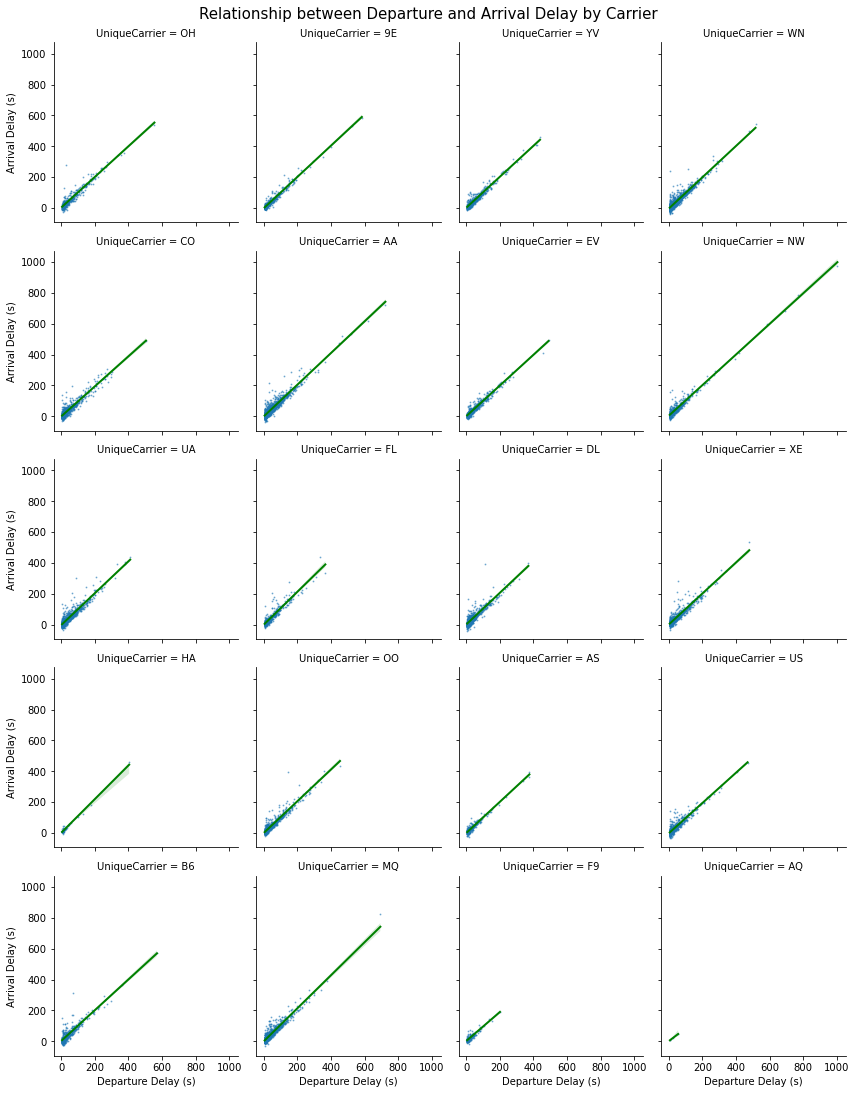

In [4]:
#plotting

#conclusions from plotting: 
#it is clear a linear relationship between delay at departure and arribal
#but distance looks like it does not affect delay at arribal delays
#carriers have the same relationship between delay at departure and arribal, but some of them have bigger delays

#we take a sample to speed up plotting
df_flight_sample=df_flight_imported.sample(15000)

fig1, ax1 = plt.subplots(figsize=(8,8))
fig1 = sns.regplot(x="DepDelay", y="ArrDelay", data=df_flight_sample)
ax1.set_title("Relationship between Departure and Arrival Delay", fontsize=15)
ax1.set_xlabel("Departure Delay (s)", fontsize=15)
ax1.set_ylabel("Arrival Delay (s)", fontsize=15)

fig2, ax2 = plt.subplots(figsize=(8,8))
fig2 = sns.regplot(x="Distance", y="ArrDelay", data=df_flight_sample)
ax2.set_title("Relationship between Distance and Arrival Delay", fontsize=15)
ax2.set_xlabel("Distance (miles)", fontsize=15)
ax2.set_ylabel("Arrival Delay (s)", fontsize=15)

fig3 = sns.lmplot(x="DepDelay", y="ArrDelay", col="UniqueCarrier", data=df_flight_sample, 
                  col_wrap=4, height=3, scatter_kws={'s': 0.8, 'alpha': 0.5}, line_kws={'lw': 2, 'color': 'green'})
fig3.fig.suptitle('Relationship between Departure and Arrival Delay by Carrier', fontsize=15, y=1.01)
fig3.set_axis_labels("Departure Delay (s)", "Arrival Delay (s)")


In [5]:
#pre-processing
#removing NaN for atributes we are going to use
df_flight_1 = df_flight[['DepDelay','AirTime','ArrDelay']].dropna()


In [6]:
#selecting predictors X and target y
X = df_flight_1[['DepDelay','AirTime']]
y = df_flight_1['ArrDelay']

#splitting in train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, random_state=1)

In [7]:
#regression models
model1 = 'SLR/MLR (Single/Multiple linear Regression)'
model2 = 'Decision Tree Regression'
model3 = 'Random Forest Regression'

model_1 = LinearRegression().fit(X_train, y_train)
model_2 = DecisionTreeRegressor(random_state=0).fit(X_train, y_train)
model_3 = RandomForestRegressor(random_state=0).fit(X_train, y_train)

In [8]:
#model 1
print(model1)
print('\n')

#we obtain R2, intercept and slope from train data
print('R2 (train):', model_1.score(X_train, y_train))
print('intercept b0:', model_1.intercept_)
print('slope b1:', model_1.coef_)

#we obtain predicted values from test data
y_pred1 = model_1.predict(X_test)
print('\npredicted response:', y_pred1, sep='\n')


#Evaluation Metrics
print('\nEvaluation metrics:')
#MSE
MSE_1 = mean_squared_error(y_test, y_pred1)
print('MSE: ', MSE_1)
#R2 from predicted data
r2_test1 = r2_score(y_test, y_pred1)
print('R2 (predicted):', r2_test1)

SLR/MLR (Single/Multiple linear Regression)


R2 (train): 0.9078599503428729
intercept b0: -1.8405502959235562
slope b1: [1.01419211 0.00288427]

predicted response:
[ 5.42896665 88.49177028 28.84479772 ... 45.06033442 18.70864514
 47.9990769 ]

Evaluation metrics:
MSE:  302.37165212739376
R2 (predicted): 0.9030087553528523


In [9]:
#model 2
print(model2)
print('\n')

#we obtain R2 from train data
print('R2 (train):', model_2.score(X_train, y_train))

#we obtain predicted values from test data
y_pred2 = model_2.predict(X_test)
print('\npredicted response:', y_pred2, sep='\n')

#Evaluation Metrics
print('\nEvaluation metrics:')
#MSE
MSE_2 = mean_squared_error(y_test, y_pred2)
print('MSE: ', MSE_2)
#R2 from predicted data
r2_test2 = r2_score(y_test, y_pred2)
print('R2 (predicted):', r2_test2)

Decision Tree Regression


R2 (train): 0.9490054358541092

predicted response:
[ 4.07407407 81.5        18.         ... 45.4        14.
 49.5       ]

Evaluation metrics:
MSE:  466.16146950345177
R2 (predicted): 0.8504701720033134


In [10]:
#model 3
print(model3)
print('\n')

#we obtain R2 from train data
print('R2 (train):', model_3.score(X_train, y_train))

#we obtain predicted values from test data
y_pred3 = model_3.predict(X_test)
print('\npredicted response:', y_pred3, sep='\n')

#Evaluation Metrics
print('\nEvaluation metrics:')
#MSE
MSE_3 = mean_squared_error(y_test, y_pred3)
print('MSE: ', MSE_3)
#R2 from predicted data
r2_test3 = r2_score(y_test, y_pred3)
print('R2 (predicted):', r2_test3)

Random Forest Regression


R2 (train): 0.9442960699523116

predicted response:
[ 4.15559701 80.72716667 18.09679789 ... 44.55550433 14.0182401
 49.32170238]

Evaluation metrics:
MSE:  382.03925661047396
R2 (predicted): 0.8774539122896703


### Exercici 2 (Nivell 1)
#### Compara’ls en base al MSE i al R2.

In [11]:
#comparation

#conclusions from comparation:
#the most simple model is the one with better results 

df_EvaluationMetrics = pd.DataFrame(data=[[r2_test1, MSE_1],[r2_test2, MSE_2],[r2_test3, MSE_3]], 
                                    columns=['R2','MSE'], index=[model1, model2, model3])
df_EvaluationMetrics

,R2,MSE
SLR/MLR (Single/Multiple linear Regression),0.903009,302.371652
Decision Tree Regression,0.850470,466.161470
Random Forest Regression,0.877454,382.039257


### Exercici 3 (Nivell 1)
#### Entrena’ls utilitzant els diferents paràmetres que admeten.

In [12]:
#parameters for Model 1
print(model1)
print(model_1.get_params())

#training model 1
#there are no parameters to fit this model, because is quite simple

SLR/MLR (Single/Multiple linear Regression)
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False}


In [13]:
#parameters for Model 2
print(model2)
print(model_2.get_params())

#training model 2

#estimator
model_2_est = DecisionTreeRegressor(random_state=0)

#selection of parameters and creating a dict for grid tool
criterion = ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
splitter = ['best', 'random']
max_features = ['sqrt', 'log2']

param_grid2 = dict(criterion=criterion, splitter=splitter, max_features=max_features)

#launching grid tool
model_2_grid = GridSearchCV(estimator=model_2_est, param_grid=param_grid2, n_jobs=-1)
model_2_result = model_2_grid.fit(X_train, y_train)

#results
print('\n')
print('Best Score: ', model_2_result.best_score_)
print('Best Params: ', model_2_result.best_params_)

Decision Tree Regression
{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 0, 'splitter': 'best'}


Best Score:  0.8496382883145971
Best Params:  {'criterion': 'absolute_error', 'max_features': 'sqrt', 'splitter': 'best'}


In [14]:
#parameters for Model 3
print(model3)
print(model_3.get_params())

#training model 3

#estimator
model_3_est = RandomForestRegressor(random_state=0)

#selection of parameters and creating a dict for grid tool
criterion = ['squared_error', 'absolute_error', 'poisson']
n_estimators = [10, 20, 30]
max_features = ['auto', 'None']

param_grid3 = dict(criterion=criterion, n_estimators=n_estimators, max_features=max_features)

#launching grid tool
model_3_grid = GridSearchCV(estimator=model_3_est, param_grid=param_grid3, n_jobs=-1)
model_3_result = model_3_grid.fit(X_train, y_train)

#results
print('\n')
print('Best Score: ', model_3_result.best_score_)
print('Best Params: ', model_3_result.best_params_)

Random Forest Regression
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}


Best Score:  0.8884926256143986
Best Params:  {'criterion': 'absolute_error', 'max_features': 'auto', 'n_estimators': 30}


In [15]:
#comparation R2 standard and R2 with best parameters

df_EvaluationMetrics_param = pd.DataFrame(data=[[r2_test2, model_2_result.best_score_],[r2_test3, model_3_result.best_score_]], 
                                    columns=['R2','R2 Parameters'], index=[model2, model3])
df_EvaluationMetrics_param

,R2,R2 Parameters
Decision Tree Regression,0.850470,0.849638
Random Forest Regression,0.877454,0.888493


### Exercici 4 (Nivell 1)
#### Compara el seu rendiment utilitzant l’aproximació traint/test o utilitzant totes les dades (validació interna).

In [16]:
model1_cross = cross_val_score(LinearRegression(), X, y)
model2_cross = cross_val_score(model_2_est, X, y)
model3_cross = cross_val_score(model_3_est, X, y)

print(model1)
print('R2 Train-Test:')
print(r2_test1)
print('R2 Cross-validation:')
print(model1_cross)
print('\n')

print(model2)
print('R2 Train-Test:')
print(r2_test2)
print('R2 Cross-validation:')
print(model2_cross)
print('\n')

print(model3)
print('R2 Train-Test:')
print(r2_test3)
print('R2 Cross-validation:')
print(model3_cross)
print('\n')

SLR/MLR (Single/Multiple linear Regression)
R2 Train-Test:
0.9030087553528523
R2 Cross-validation:
[0.91355512 0.90578813 0.90899058 0.9024437  0.90000025]


Decision Tree Regression
R2 Train-Test:
0.8504701720033134
R2 Cross-validation:
[0.86589762 0.85898537 0.85872359 0.86208107 0.84481011]


Random Forest Regression
R2 Train-Test:
0.8774539122896703
R2 Cross-validation:
[0.88749535 0.8842753  0.88488049 0.88255903 0.87491515]




### Exercici 5 (Nivell 2)
#### Realitza algun procés d’enginyeria de variables per millorar-ne la predicció.

In [ ]:
#no time to do it

### Exercici 6 (Nivell 3)
#### No utilitzis la variable DepDelay a l’hora de fer prediccions.

In [ ]:
#no time to do it